<a href="https://colab.research.google.com/github/guicorazza/Finance/blob/main/Monte_Carlo_Simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Monte Carlos Simulations


##Forecasting Stock Prices


$S_t = S_0\cdot \ e^r$

where r is the log return of the share, however, we don't know r.

Brownian Motion is a stochastic process which is described by a Stochastic Differential Equation (SDE) as follows:

$dS_t = μS_t\ dt+σS_t\ dB_t$

Solving the SDE gives us:

$ln \frac{S_t}{S_0} = (μ - \frac{σ^2}{2})t + \sigma B_t$
⇒ $S_t=S_0\cdot e^{(\mu - \frac{\sigma^2}{2}) + \sigma B_t}$

We can use Brownian Motion in order to model r. For that we'll need to find the two components: Drift and Volatility.

##Drift


It is the direction that rates of return have been headed in the past. We'll use daily adjusted closing prices to calculate the log returns of the share. After calculating average, standard deviation and variance of daily returns in the historical period, we can find the Drift with the formula below.

$Drift = (\mu - \frac{\sigma^2}{2})$

where $\mu$ is the average daily return and $\sigma^2$ is the variance.

It is recognized that historical values are eroded in the future, hence a random component is included: 0.5 times the variance.

**The drift is the expected daily return of the stock.**

##Volatility

The second component of the Brownian motion is a random variable.
It is given by a stock's historical volatility multiplied by Z of a random number between 0 and 1.

$\sigma B_t = \sigma Z(Rand(0;1))$

The random number from 0 to 1 is a percentage. If we assume expected future returns are distributed normally, Z of the percentage will give us the number of standard deviations away from the mean.

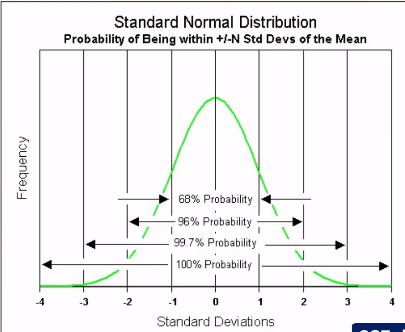

##Coding

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [3]:
import yfinance as yf
yf.pdr_override()

In [5]:
ticker = 'VALE3.SA'
data = pd.DataFrame()
data = wb.get_data_yahoo(ticker)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [10]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

Date
2023-01-05    0.016639
2023-01-06    0.015717
2023-01-09    0.001082
2023-01-10    0.012257
2023-01-11   -0.005572
Name: Adj Close, dtype: float64

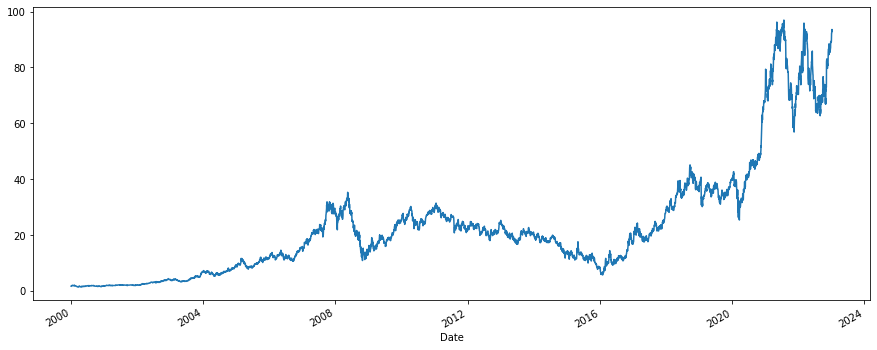

In [11]:
data.plot(figsize=(15,6))

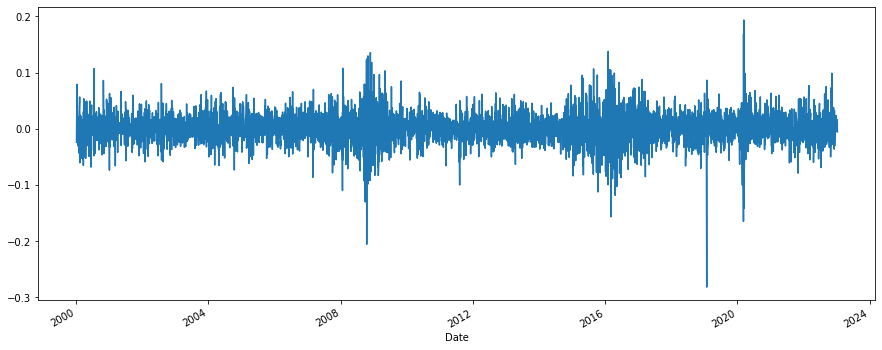

In [12]:
log_returns.plot(figsize=(15,6))

In [13]:
mu = log_returns.mean()
mu

0.0006917225590110411

In [14]:
var = log_returns.var()
var

0.0006578648535035998

As we saw above, $drift = \mu - \frac{σ^2}{2}$, and $σ^2$ is the variance of the series.

In [30]:
drift = mu - 0.5*var
drift

0.0003627901322592412

In [16]:
stdev = log_returns.std()
stdev

0.025648876262004145

The second component of the Brownian motion is Z, which corresponds to the distance between the series' mean and the events, expressed as the number of standard deviations (considering a Normal Distribution).

To calculate that we use norm.ppf(), which gives us, for a specific confidence interval, the distance from the mean in standard deviation multiples, e.g.:

In [29]:
norm.ppf(0.95)

1.6448536269514722

an event with 95% chance of occurring will have a distance of approximately 1.65 standard deviations from the mean.

Let's simulating 10 paths of the price for the next 252 trading days.

In [39]:
t_intervals = 252
iterations = 10

We have established that:
$daily\ returns = e^r$

and

$r = drift + \sigma \cdot Z$

In [40]:
daily_returns = np.exp(drift + stdev*norm.ppf(np.random.rand(t_intervals,
                                                             iterations)))
daily_returns

array([[1.00871069, 1.03134015, 1.06755347, ..., 1.03860682, 1.01020157,
        0.94225976],
       [0.99975251, 0.98130023, 1.02336553, ..., 0.98472328, 1.00867701,
        0.99044595],
       [1.00545545, 1.00023198, 1.00375736, ..., 1.03202909, 1.00833887,
        1.01209207],
       ...,
       [0.96465919, 0.98953144, 0.98509061, ..., 1.02853539, 0.96795685,
        1.0575063 ],
       [1.02534085, 1.02335737, 0.97729849, ..., 0.9750214 , 0.9787406 ,
        0.9755194 ],
       [0.99983429, 0.93739912, 1.01809459, ..., 1.02506639, 0.99637011,
        0.98086869]])

$S_t = S_0 \cdot daily\ return_t\\
S_{t+1} = S_t \cdot daily\ return_{t+1}\\
\vdots\\
S_{t+n} = S_{t+n-1} \cdot daily\ return_{t+n}$

In [41]:
S0 = data.iloc[-1] #our original price S0 will be the last price in our data.
S0

93.05999755859375

In [42]:
price_list = np.zeros_like(daily_returns)
#this method allows you to create a matrix with the same dimensions as the reference
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
price_list[0] = S0
price_list

array([[93.05999756, 93.05999756, 93.05999756, ..., 93.05999756,
        93.05999756, 93.05999756],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [44]:
for t in range(1, t_intervals):
  price_list[t] = price_list[t-1] * daily_returns[t]
price_list

array([[ 93.05999756,  93.05999756,  93.05999756, ...,  93.05999756,
         93.05999756,  93.05999756],
       [ 93.0369662 ,  91.31979666,  95.23439417, ...,  91.63834635,
         93.86748023,  92.17089745],
       [ 93.54452496,  91.34098067,  95.59222369, ...,  94.57343919,
         94.65022858,  93.28543403],
       ...,
       [ 67.0699656 , 132.23243144, 134.35369714, ..., 114.73530308,
        125.46161714, 126.21804777],
       [ 68.76957531, 135.32103364, 131.30366576, ..., 111.86937533,
        122.7943782 , 123.12815479],
       [ 68.75817929, 126.84981811, 133.67955171, ..., 114.67353623,
        122.34864795, 120.77255138]])

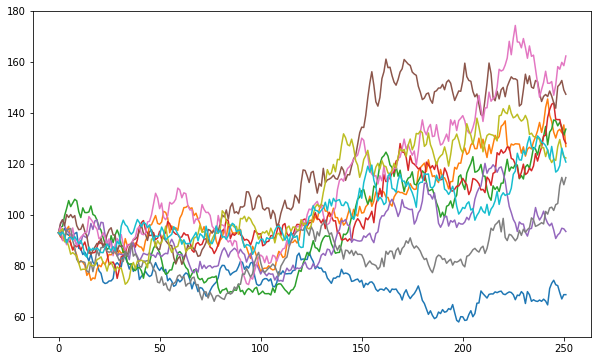

In [45]:
plt.figure(figsize=(10,6))
plt.plot(price_list)
plt.show()

Using the Monte Carlo Simulation, we can estimate on the probability of a stock quote reaching a certain price. This is mostly useful for derivatives pricing. Let's make an example below.

In [59]:
strike = 120
price_qty_above = (price_list[-1] > strike).sum()
price_qty_below = (price_list[-1] <= strike).sum()
price_prob_True = price_qty_above / (price_qty_above + price_qty_below)
print('There is {:0.2f}% probability that the stock will be above R${} in {} days.'.format(price_prob_True*100, strike, t_intervals))

There is 70.00% probability that the stock will be above R$120 in 252 days.
